# Week 6: Dimensionality Reduction and Manifold Learning
Given X but no output Y so the machines need to study themselves

### Why need to use Dimensionality Reduction (DR)
- Too many features (often involves thousands, sometimes millions of features)
- Make training extremely slow because of increased computation complexity
- Make it more difficult to find a good solution
- Referred to as the curse of dimensionality
- Useful for visualisation (3-D space instead of 4D or above)
- Possible to plot a condensed view of a high-dimensional training set
- Easily detect pattens (clusters) and easily show/communicate to people who are not data scientists

**More**:
- Reduce the numbe of features while perserving as much as relevant information as possible
- Speed up training
- Might lead to some information loss

### Manifold Learning (MAL)
Important role in analysing complex high-dimensional data by providing a way to represent it in a more interpratable and managable form
- Challenging to visualise, analyse and model a data in high-dimensional spaces
- Try to discover the underlying structure and make a lower-dimensional version (representations of the data) while preserving its essential structue

#### Swiss roll
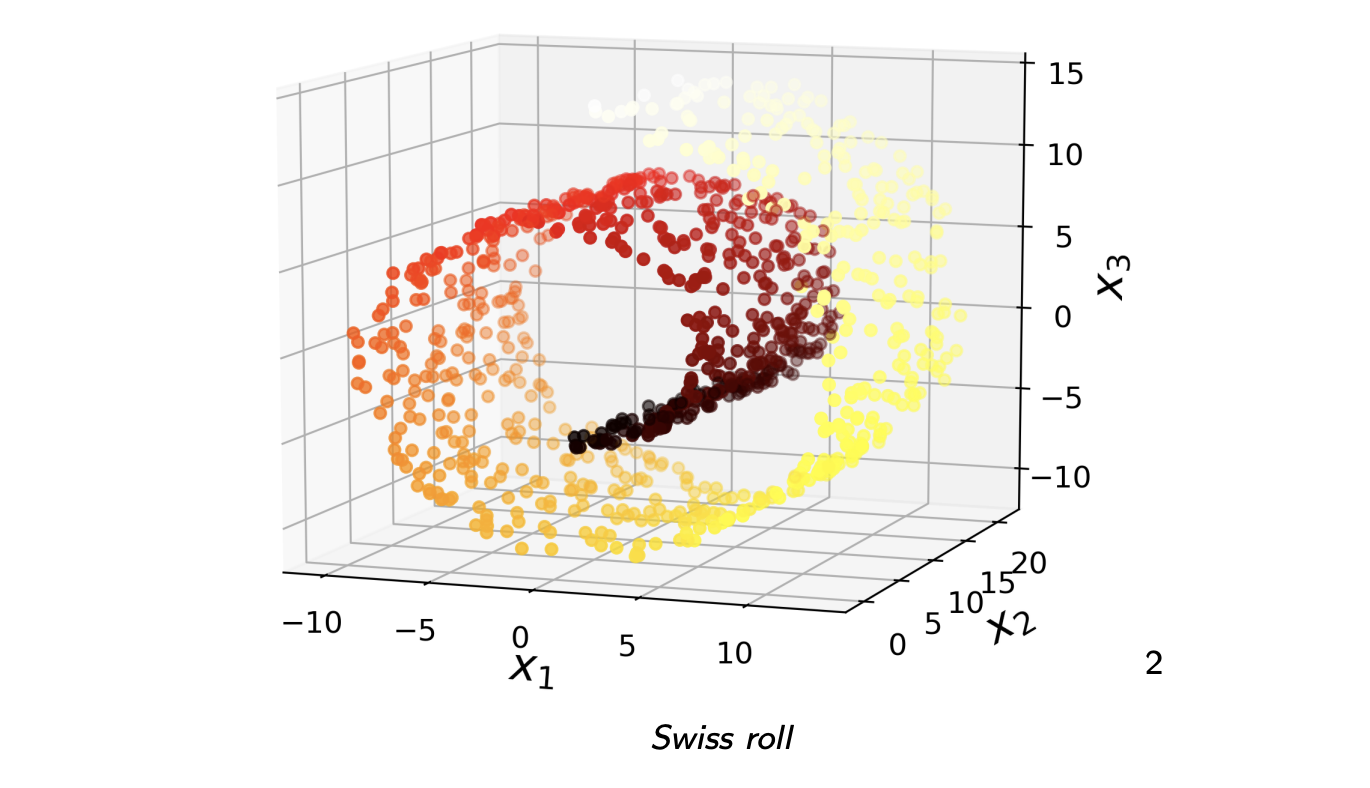
(2D plot embedded in 3D plot)

## General definition
Suppose d < n, a d-dimensional manifold is a subset of the n-dimensional space that locally resembles a d-dimensional hyperplane.
- Swiss roll is an example of 2D manifold
- d = 2, n = 3
- Locally resembles (looks like at some spaces) 2D plane, but bent and twisted in the 3D

### An implicit assumption
- Simpler to model the task (classification and regression) in lower-D space of the manifold
- In high D space, decision boudary look very complex but in 2D unrolled manifold space, it is simpler, a straight line or many lines
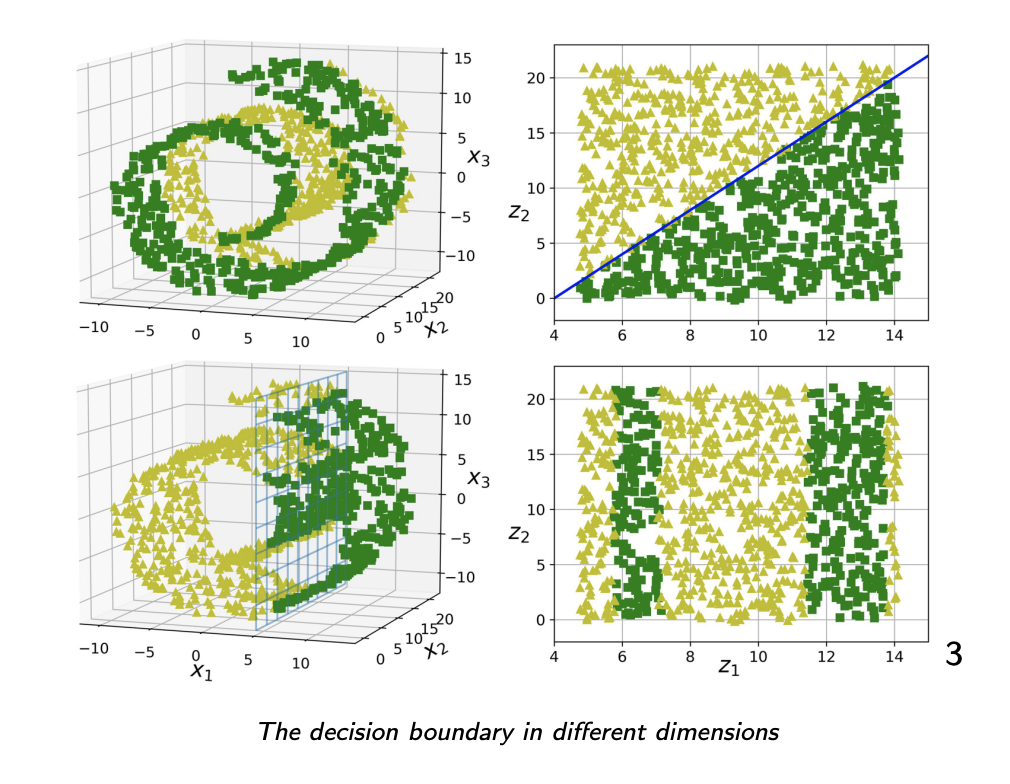

## PCA: Principle component analysis
The most popular DR algorithm
- Try to find the hyperplane that lines closest to the dataset
- Project (Chiếu) the dataset onto the hyperplane
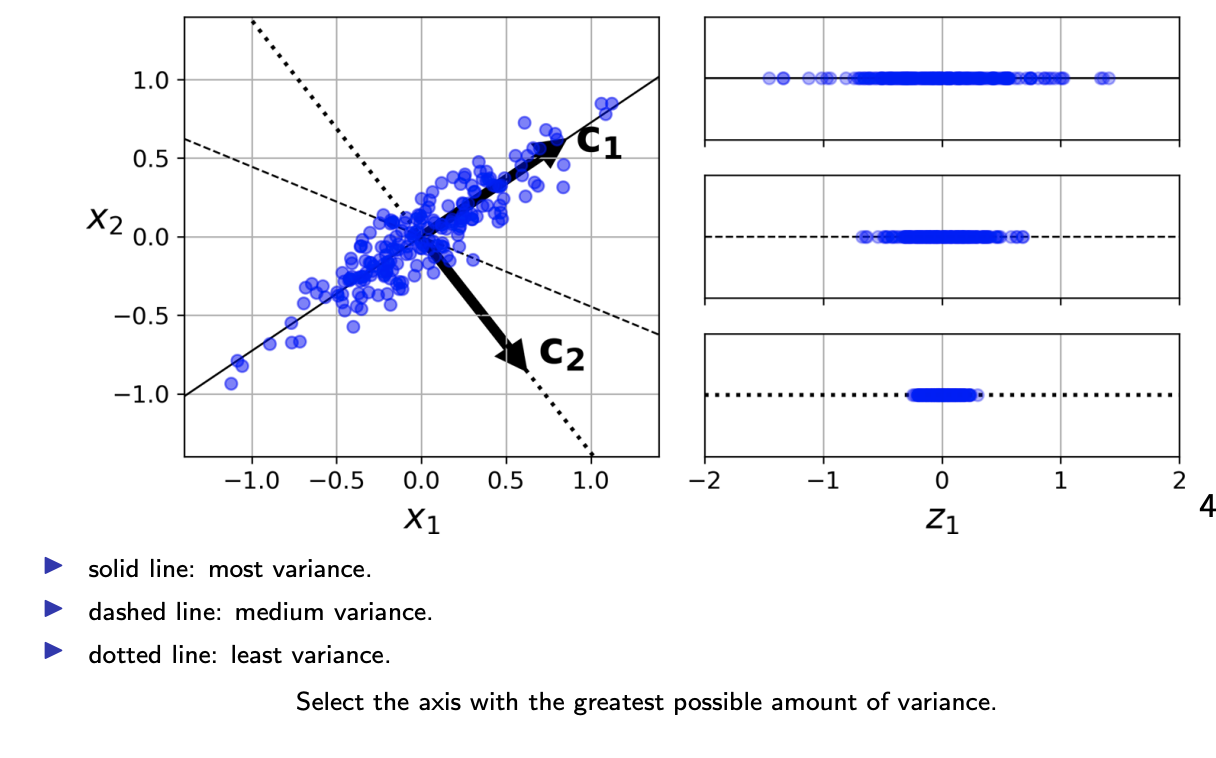
(The best one with the most variance)

### How to find a hyperplane?
- Select the simple hyperplane (axis) that preserves the greatest amount of variance
- Likely loss less information
- Has the minimum mean squared distance beteen the original dataset and the project
- Choose the **first axis**, **highest variance after projection**
- Then choose the **second axis**, **orthogonal** and **preserve the largest** amount of remaining variance, **and so on**

### Principal components (PC)
The unit vector that define the $i^{th}$ axis is called the $i^{th}$ PC
- The first PC is unit vector $c_1$
- The second PC is unit vector $c_2$
- All PCs are orthogonal to each other
- **Numbers of PCs is the same as the number of dimensions** in the feature space

### Singular Value Decomposition (SVD)
- The standard matrix factorisation called SVD can find all the PCs
- The SVD decompose the training set matrix X into the dot product of three matrices: $$X = U . \Sigma . V^T$$ where $V = (c_1 c_2 \dots c_n)$ contains all the PCs in the corresponding **columns** and $V^T$ in **rows**

In [5]:
import numpy as np

In [122]:
x1 = 2*np.random.rand(100,1)  # linear random data, mean 0, std 1. Size 100x1
x2 = 4 + 4*x1 + np.random.randn(100,1)
x3 = x1**2 + x2**2

X = np.c_[x1,x2,x3] # Size 100x3. (Concatenate along columns)

In [124]:
X.mean(axis = 0) # mean of each columns

array([ 0.97697648,  7.88990867, 70.52831909])

In [126]:
X_centered = X - X.mean(axis = 0) 
# All value in column minus the corresponding mean
# Necessary step to standardise data (especially for PCA)
# New matrix have mean equal to or nearly to 0 for every column

In [128]:
U, s, Vt = np.linalg.svd(X_centered)
Vt

array([[ 0.01127509,  0.05751161,  0.99828117],
       [-0.21544871, -0.97475592,  0.0585897 ],
       [-0.97645006,  0.21573899, -0.00140035]])

In [130]:
c1 = Vt[0] # PC1 # Remind Vt (already transposed so it in rows for PCs)
c2 = Vt[1] # PC2
# c3 = Vt[2] # PC3 # If you want, but we want to DR so we wont take it

**Once the PCs are obtained**:
- The dimensionality of the dataset can be reduced down to d-dimensions by projecting the dataset onto the hyperplane corresponding to the **first $d$ PC**
- This hyperplance ensure the preservation of the maximum variance

### Projection
Computing the dot product of the training set (X) by the matrix containing the first d column (PC) of V ($W_d$)
$$X_{d-proj} = X . W_d$$

In [132]:
W2 = Vt[:2].T # Only choose PC1 and PC2, then transpose PC in terms of row to columns
X2D = X_centered.dot(W2) # Above formula

In [13]:
from sklearn.decomposition import PCA # PCA directly (do not go through SVD)
pca = PCA(n_components = 2) # Setting step with 2 PCs default
X2D = pca.fit_transform(X)
pca.components_ # Vt[:2] above and be transposed become Wd above

array([[-1.12908934e-17, -3.58643254e-19, -5.97631724e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.43584777e-17,  7.20114325e-19, -1.64195552e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [136]:
pca.explained_variance_ratio_

array([9.99855565e-01, 1.22828261e-04])

### Explained Varianc Ratio
It quantifies the percentage/proportion of dataset variance that lies along each axis (PC). In above result:
- The first PC explains 99.99%
- The second PC explains 0.01

## Choosing the right number of dimensions
Adds up to a *sufficiently significant* portion of the variance (ie. 95%)

In [138]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [161]:
mnist = fetch_openml('mnist_784', version = 1, as_frame = False) #result is numpy instead of pandas df
mnist.target = mnist.target.astype(np.uint8)
# mnist.target is originally int64
# Change into uint to make it less heavy for the storage, speed up the process

In [102]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [267]:
X = mnist['data'] # 70000 x 784
y = mnist['target'] # 70000 x (1)
X_train, X_test, y_train, y_test = train_test_split(X, y) # Default = 0.25 for test

In [249]:
pca = PCA()
pca.fit(X_train)

PCA()

In [251]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
# cumsum = cummulative sum (add next val and keep going until end)
d = np.argmax(cumsum >= 0.95) + 1     # 154
# Choose when the explained variance ratio reach 95%
## np.argmax(boolean) give the result of the index that first show True
## np.argmin(boolean) give the result of the index that first show False
## np.argmax(number) gives the result of the index that have the biggest value

In [253]:
pca = PCA(n_components = d) # DR to d PC
X_DR = pca.fit_transform(X_train)
X_DR[:5,1]

array([-269.35871949, -282.79305435,  584.36713731,  125.40726416,
        -12.18360016])

In [238]:
pca = PCA(n_components = 0.95) 
# Same as above step (with slight difference due to % difference)
# above use 154 dimensions (0.9503772814117954) and here use exactly 0.95
X_DR = pca.fit_transform(X_train)
X_DR[:5,1]

array([-269.35871958, -282.7930543 ,  584.36713731,  125.40726419,
        -12.1836002 ])

### Another option: Plotting
Plot the explained variance as a function of the number of dimension
- Look for the elbow, where the explained varience's growth slows down
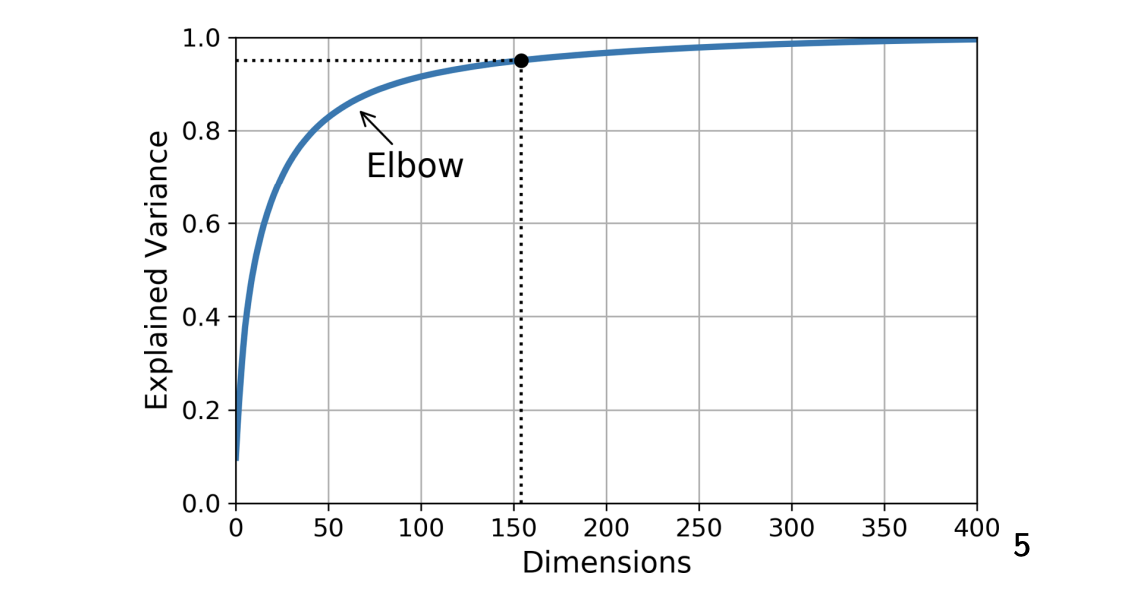

## PCA for Compression (Nén, Cô đọng)
- After DR, the training set takes up less space
- Retains 95% of the explained variance, keeps 154 features instead of 784 features
- Most of the variance is still preserved
- 20% (154:784) is a reasonale compression ratio
- Size reduction can speed up a classification algorithm

## Inverse the transformation
- Recover the dataset from PCA projection
- Decompress the reduced dataset to original size by applying the inverse transformation
- Not exactly the same (due to projection loss), but should be close to the original data
- Reconstruction error: the mean squared distance between the original and the reconstructed (compressed and then decompressed) data
- The equation: $$X_{d-recovered} = X_{d-project} . W_d^T$$

In [277]:
pca = PCA(n_components = 154) # Only choose first 154
X_reduced = pca.fit_transform(X_train) # Change into 154 but originally has 784 features
X_recovered = pca.inverse_transform(X_reduced)

## Incremental PCA (IPCA)
IPCA algorithm **does not require to fit in memory the whole training set**
- The training set is **split into mini-batches (subsets)**
- Feed an IPCA algorithm one mini-batch at a time **until all are in use**
- Useful for large training set

In [280]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)

In [282]:
for X_batch in np.array_split(X_train, n_batches): 
    # split X_train into 100 batches and use it from 1-100
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

## Linear Discriminant Analysis (LDA)
- Supervised method for DR for classification problems
- During training, it learn the most distinct axes between the classes
- These axes define a hyperplane onto which to project the data
- The projection keeps classes as far apart as possible
- Useful for reducing dimensionality before running another classification algorithm

# Tutorial

In [7]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [9]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("d=", d)  #154

pca95 = PCA(n_components=d)
X_reduced95 = pca95.fit_transform(X_train)
X_reduced95.shape
# X_recovered = pca.inverse_transform(X_reduced)

d= 154


(52500, 154)

In [21]:
pca85 = PCA(n_components=0.85)
X_reduced85 = pca85.fit_transform(X_train)
X_reduced85.shape

(52500, 59)

In [27]:
pca98 = PCA(n_components=0.98)
X_reduced98 = pca98.fit_transform(X_train)
X_reduced98.shape

(52500, 260)

In [33]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum[99] ## d = 100 = 99 + 1
# 91.49%

0.9149853099706792